In [4]:
import numpy as np
import cantera as ct
import matplotlib.pyplot as plt

In [25]:
##reaction('HO2 + H <=> H2 + O2', [ 1.13542846e+07,  1.93886071e+00, -6.42325352e+02])
def calc_arr(T,A,n,Ea):
    k = A*(T**n)*np.exp(-Ea/(1.987*T))
    return k 
k_original = []
temperature_range = np.arange(200,2000)
for temp in temperature_range:
    k = calc_arr(temp,1.13542846e+07,1.93886071e+00,-6.42325352e+02)
    k_original.append(k)

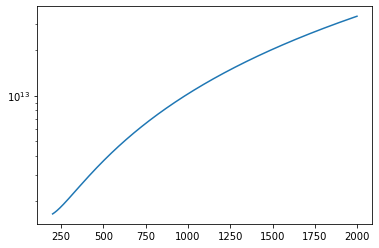

In [26]:
plt.semilogy(temperature_range,k_original)

In [27]:
gas = ct.Solution('/Users/carlylagrotta/Dropbox/Columbia/MSI/data/branching_reaction_study/FFCM1_custom_cheb_extra_zeros_precursors_and_theory.cti')
print(gas.reaction_equations()[10])
gas.reaction_equations()[11]
k_10=[]
for temp in temperature_range:
    gas.TPX = temp,ct.one_atm,{'Ar':1}
    k_10.append(gas.forward_rate_constants[10]*1000)
    

H + HO2 <=> H2 + O2


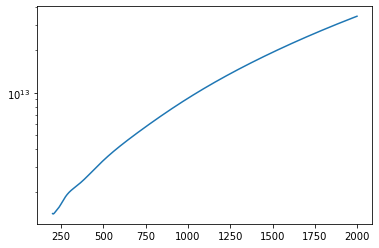

In [28]:
plt.semilogy(temperature_range,k_10)

In [29]:
gas = ct.Solution('/Users/carlylagrotta/Dropbox/Columbia/MSI/data/branching_reaction_study/FFCM1_custom_cheb_extra_zeros_precursors_and_theory.cti')
print(gas.reaction_equations()[10])
gas.reaction_equations()[11]
k_11=[]
for temp in temperature_range:
    gas.TPX = temp,ct.one_atm,{'Ar':1}
    k_11.append(gas.forward_rate_constants[11]*1000)

H + HO2 <=> H2 + O2


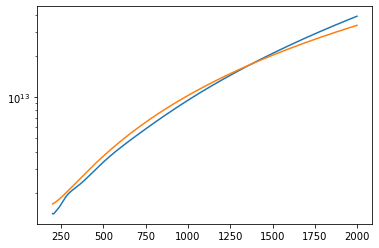

In [31]:
plt.semilogy(temperature_range,np.array(k_10)+np.array(k_11))
plt.semilogy(temperature_range,k_original)

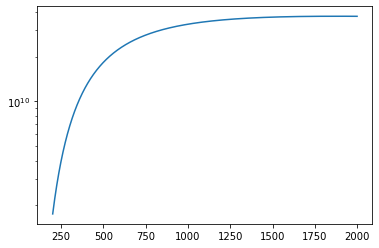

In [34]:
k_test = []
gas = ct.Solution('/Users/carlylagrotta/Dropbox/Columbia/MSI/data/branching_reaction_study/FFCM1_custom_cheb_extra_zeros_precursors_and_theory.cti')
gas.reaction_equations().index('CH3 + OH <=> CH2O + H2')
for temp in temperature_range:
    gas.TPX = temp,ct.one_atm,{'Ar':1}
    k_test.append(gas.forward_rate_constants[104]*1000)    
plt.semilogy(temperature_range,k_test)

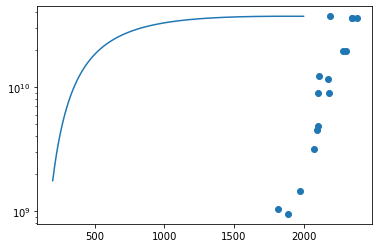

In [35]:
T_target = [1817,
2104,
2175,
2348,
2383,
2304,
2072,
2094,
1972,
2103,
2185,
2346,
1886,
2188,
2284,
2112]
k_target=[1.71e-15,8.04e-15,1.92e-14,6.00e-14,5.98e-14,3.24e-14,5.26e-15,7.44e-15,2.39e-15,1.50e-14,1.50e-14,5.97e-14,1.57e-15,6.19e-14,3.23e-14,2.04e-14]
k_array = np.array(k_target)*6.023e23

plt.semilogy(temperature_range,k_test)
plt.scatter(T_target,k_array)